In [2]:
from google.colab import files
uploaded = files.upload()


Saving placementdata.csv to placementdata.csv


📌 Step 1: Data Loading & Inspection

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data
df = pd.read_csv('placementdata.csv')

# Basic inspection
print("First 5 rows:")
df.head()




First 5 rows:


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [8]:
print("\nDataset info:")
df.info()



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [9]:
print("\nMissing values:")
print(df.isna().sum())


Missing values:
StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64


📌 Step 2: Data Cleaning with NumPy/Pandas

In [10]:
# Fill missing CGPA with median (NumPy approach)
cgpa_median = np.nanmedian(df['CGPA'])
df['CGPA'] = df['CGPA'].fillna(cgpa_median)

# Convert categorical to numerical (Pandas map)
df['PlacementStatus'] = df['PlacementStatus'].map({'Placed': 1, 'Not Placed': 0})
df['PlacementTraining'] = df['PlacementTraining'].map({'Yes': 1, 'No': 0})
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map({'Yes': 1, 'No': 0})


📌 Step 3: Data Analysis Operations

In [11]:
#A. Basic Statistics with NumPy
print("\nBasic statistics:")
print("Mean CGPA:", np.mean(df['CGPA']))
print("Median Aptitude Score:", np.median(df['AptitudeTestScore']))
print("Standard deviation of Soft Skills Rating:", np.std(df['SoftSkillsRating']))



Basic statistics:
Mean CGPA: 7.698010000000001
Median Aptitude Score: 80.0
Standard deviation of Soft Skills Rating: 0.4116016501424862


In [ ]:
#B. Advanced Pandas Operations
# Groupby analysis
training_effect = df.groupby('PlacementTraining')['PlacementStatus'].mean()
print("\nPlacement rate by training:")
print(training_effect)

# Filtering
high_cgpa_placed = df[(df['CGPA'] > 8.0) & (df['PlacementStatus'] == 1)]
print("\nNumber of placed students with CGPA > 8.0:", len(high_cgpa_placed))



Placement rate by training:
PlacementTraining
0    1.0
1    1.0
Name: PlacementStatus, dtype: float64

Number of placed students with CGPA > 8.0: 2457


In [ ]:
#C. Pivot Tables
pivot = pd.pivot_table(df,
                       index='PlacementTraining',
                       columns='ExtracurricularActivities',
                       values='PlacementStatus',
                       aggfunc='mean')
print("\nPlacement rate by training and extracurricular activities:")
print(pivot)




Placement rate by training and extracurricular activities:
ExtracurricularActivities    0    1
PlacementTraining                  
0                          1.0  1.0
1                          1.0  1.0


In [ ]:
#  Creating arrays from columns
cgpa_array = np.array(df['CGPA'])
apt_array = np.array(df['AptitudeTestScore'])
print("CGPA array:", cgpa_array[:5])
print("Aptitude array:", apt_array[:5])


CGPA array: [7.5 8.9 7.3 7.5 8.3]
Aptitude array: [65 90 82 85 86]


In [ ]:
#  Indexing and slicing from CGPA array
print("First CGPA:", cgpa_array[0])
print("CGPAs from index 2 to 6:", cgpa_array[2:7])


First CGPA: 7.5
CGPAs from index 2 to 6: [7.3 7.5 8.3 7.  7.7]


In [ ]:
#  Indexing and slicing from CGPA array
print("First CGPA:", cgpa_array[0])
print("CGPAs from index 2 to 6:", cgpa_array[2:7])


First CGPA: 7.5
CGPAs from index 2 to 6: [7.3 7.5 8.3 7.  7.7]


In [ ]:
# Reshape CGPA array into 2D (if total is divisible)
reshaped_cgpa = cgpa_array[:12].reshape(4, 3)
print("Reshaped CGPA (4x3):\n", reshaped_cgpa)


Reshaped CGPA (4x3):
 [[7.5 8.9 7.3]
 [7.5 8.3 7. ]
 [7.7 7.7 6.5]
 [7.8 8.3 7.9]]


In [ ]:
# Concatenate CGPA and Aptitude arrays
combined = np.concatenate((cgpa_array[:5], apt_array[:5]))
print("Concatenated CGPA + Aptitude:", combined)

# Split combined array
split_combined = np.array_split(combined, 2)
print("Split arrays:", split_combined)


Concatenated CGPA + Aptitude: [ 7.5  8.9  7.3  7.5  8.3 65.  90.  82.  85.  86. ]
Split arrays: [array([7.5, 8.9, 7.3, 7.5, 8.3]), array([65., 90., 82., 85., 86.])]


In [ ]:
# ✅ Apply universal functions
print("Squared CGPA values:", np.square(cgpa_array[:5]))
print("Log of Aptitude scores:", np.log1p(apt_array[:5]))
print("Exponential of Soft Skills:", np.exp(df['SoftSkillsRating'][:5]))


Squared CGPA values: [56.25 79.21 53.29 56.25 68.89]
Log of Aptitude scores: [4.18965474 4.51085951 4.41884061 4.4543473  4.46590812]
Exponential of Soft Skills: 0     81.450869
1     54.598150
2    121.510418
3     81.450869
4     90.017131
Name: SoftSkillsRating, dtype: float64


In [ ]:
#  Aggregate statistics
print("Mean CGPA:", np.mean(cgpa_array))
print("Max Aptitude Score:", np.max(apt_array))
print("Std Dev of Soft Skills:", np.std(df['SoftSkillsRating']))


Mean CGPA: 7.698010000000001
Max Aptitude Score: 90
Std Dev of Soft Skills: 0.4116016501424862


In [ ]:
#  Add bonus marks to Aptitude scores (broadcasting)
bonus = 5
updated_apt = apt_array + bonus
print("Aptitude after bonus:", updated_apt[:5])


Aptitude after bonus: [70 95 87 90 91]


In [ ]:
#  Mask: CGPA > 8
high_cgpa = cgpa_array > 8
print("Students with CGPA > 8:", cgpa_array[high_cgpa])

# Fancy indexing
print("CGPA at indices 1, 3, 5:", cgpa_array[[1, 3, 5]])


Students with CGPA > 8: [8.9 8.3 8.3 ... 8.4 8.9 8.4]
CGPA at indices 1, 3, 5: [8.9 7.5 7. ]


In [ ]:
#  Sorting CGPA and Aptitude
sorted_cgpa = np.sort(cgpa_array)
print("Sorted CGPA:", sorted_cgpa)

sorted_apt = np.sort(apt_array)
print("Sorted Aptitude Scores:", sorted_apt)


Sorted CGPA: [6.5 6.5 6.5 ... 9.1 9.1 9.1]
Sorted Aptitude Scores: [60 60 60 ... 90 90 90]


In [ ]:
#  Structured array using StudentID and CGPA
structured = np.array(list(zip(df['StudentID'], df['CGPA'])),
                      dtype=[('student', 'U20'), ('cgpa', 'f4')])
print("First 5 records in structured array:")
print(structured[:5])


First 5 records in structured array:
[('1', 7.5) ('2', 8.9) ('3', 7.3) ('4', 7.5) ('5', 8.3)]


In [12]:
# Creating a Pandas Series from CGPA
cgpa_series = pd.Series(df['CGPA'])
print("First 5 CGPA values:")
print(cgpa_series.head())

First 5 CGPA values:
0    7.5
1    8.9
2    7.3
3    7.5
4    8.3
Name: CGPA, dtype: float64


In [13]:
# Creating a DataFrame from multiple columns
mini_df = pd.DataFrame({
    'CGPA': df['CGPA'],
    'Aptitude': df['AptitudeTestScore'],
    'PlacementStatus': df['PlacementStatus']
})
print("Mini DataFrame:")
print(mini_df.head())


Mini DataFrame:
   CGPA  Aptitude  PlacementStatus
0   7.5        65              NaN
1   8.9        90              1.0
2   7.3        82              NaN
3   7.5        85              1.0
4   8.3        86              1.0


In [14]:
# Selecting single column
print("CGPA column:")
print(df['CGPA'].head())

# Selecting multiple columns
print("CGPA and Aptitude columns:")
print(df[['CGPA', 'AptitudeTestScore']].head())

# Row selection with .loc and .iloc
print("Row at index 2 (loc):")
print(df.loc[2])

print("Row at index 2 (iloc):")
print(df.iloc[2])


CGPA column:
0    7.5
1    8.9
2    7.3
3    7.5
4    8.3
Name: CGPA, dtype: float64
CGPA and Aptitude columns:
   CGPA  AptitudeTestScore
0   7.5                 65
1   8.9                 90
2   7.3                 82
3   7.5                 85
4   8.3                 86
Row at index 2 (loc):
StudentID                     3.0
CGPA                          7.3
Internships                   1.0
Projects                      2.0
Workshops/Certifications      2.0
AptitudeTestScore            82.0
SoftSkillsRating              4.8
ExtracurricularActivities     1.0
PlacementTraining             0.0
SSC_Marks                    79.0
HSC_Marks                    80.0
PlacementStatus               NaN
Name: 2, dtype: float64
Row at index 2 (iloc):
StudentID                     3.0
CGPA                          7.3
Internships                   1.0
Projects                      2.0
Workshops/Certifications      2.0
AptitudeTestScore            82.0
SoftSkillsRating              4.8
Extracurric

In [15]:
# Add CGPA and AptitudeTestScore (aligned by index)
total_score = df['CGPA'] + df['AptitudeTestScore']
print("Combined CGPA + Aptitude (first 5):")
print(total_score.head())

# Subtract SSC and HSC Marks
marks_diff = df['HSC_Marks'] - df['SSC_Marks']
print("Difference in HSC and SSC marks:")
print(marks_diff.head())


Combined CGPA + Aptitude (first 5):
0    72.5
1    98.9
2    89.3
3    92.5
4    94.3
dtype: float64
Difference in HSC and SSC marks:
0    18
1     4
2     1
3    -1
4    14
dtype: int64


In [16]:
# Check for missing values
print("Missing values in each column:")
print(df.isna().sum())

# Fill missing CGPA with median
df['CGPA'] = df['CGPA'].fillna(df['CGPA'].median())

# Drop rows with any missing values (if needed)
df_cleaned = df.dropna()
print("Rows after dropping NA:", len(df_cleaned))


Missing values in each column:
StudentID                       0
CGPA                            0
Internships                     0
Projects                        0
Workshops/Certifications        0
AptitudeTestScore               0
SoftSkillsRating                0
ExtracurricularActivities       0
PlacementTraining               0
SSC_Marks                       0
HSC_Marks                       0
PlacementStatus              5803
dtype: int64
Rows after dropping NA: 4197


In [17]:
# Set a multi-level index using PlacementTraining and PlacementStatus
df_multi = df.set_index(['PlacementTraining', 'PlacementStatus'])
print("Hierarchically indexed DataFrame:")
print(df_multi.head())

# Accessing data from multi-index
print("Data for Training=1 and Placed=1:")
print(df_multi.loc[(1, 1)].head())


Hierarchically indexed DataFrame:
                                   StudentID  CGPA  Internships  Projects  \
PlacementTraining PlacementStatus                                           
0                 NaN                      1   7.5            1         1   
1                 1.0                      2   8.9            0         3   
0                 NaN                      3   7.3            1         2   
1                 1.0                      4   7.5            1         1   
                  1.0                      5   8.3            1         2   

                                   Workshops/Certifications  AptitudeTestScore  SoftSkillsRating  \
PlacementTraining PlacementStatus                                                                  
0                 NaN                                     1                 65               4.4   
1                 1.0                                     2                 90               4.0   
0                 NaN     

<ipython-input-17-ebdd80d524db>:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(df_multi.loc[(1, 1)].head())


In [18]:
# Split data into two parts and then concatenate them back
df_part1 = df.iloc[:len(df)//2]
df_part2 = df.iloc[len(df)//2:]
df_concat = pd.concat([df_part1, df_part2])

print("Shape after concatenation:", df_concat.shape)


Shape after concatenation: (10000, 12)


In [23]:
#MERGING

# Create dummy bonus data
bonus_df = pd.DataFrame({
    'StudentID': df['StudentID'],
    'BonusPoints': np.random.randint(1, 10, len(df))
})

# Merge original df with bonus_df on StudentID
df_merged = pd.merge(df, bonus_df, on='StudentID')
print("Merged DataFrame with Bonus Points:")
print(df_merged[['StudentID', 'BonusPoints']].head())




Merged DataFrame with Bonus Points:
   StudentID  BonusPoints
0          1            1
1          2            4
2          3            8
3          4            3
4          5            7


In [24]:
#JOIN

# Set StudentID as index and perform left join
df_left_join = df.set_index('StudentID').join(bonus_df.set_index('StudentID'), how='left')

print("Left Join Result:")
print(df_left_join[['CGPA', 'BonusPoints']].head())


Left Join Result:
           CGPA  BonusPoints
StudentID                   
1           7.5            1
2           8.9            4
3           7.3            8
4           7.5            3
5           8.3            7


In [25]:
#Grouping

# Group by Placement Status and compute average CGPA and Aptitude
grouped_stats = df.groupby('PlacementStatus')[['CGPA', 'AptitudeTestScore']].mean()
print("Average CGPA and Aptitude by Placement Status:")
print(grouped_stats)


Average CGPA and Aptitude by Placement Status:
                     CGPA  AptitudeTestScore
PlacementStatus                             
1.0              8.016488          84.455802


In [26]:
#PIVOT TABLE

# Pivot table: Placement rate by training and extracurricular activities
pivot_table = pd.pivot_table(df,
                              index='PlacementTraining',
                              columns='ExtracurricularActivities',
                              values='PlacementStatus',
                              aggfunc='mean')
print("Placement rate by training and extracurricular activities:")
print(pivot_table)


Placement rate by training and extracurricular activities:
ExtracurricularActivities    0    1
PlacementTraining                  
0                          1.0  1.0
1                          1.0  1.0


📌 Step 4: Data Visualization

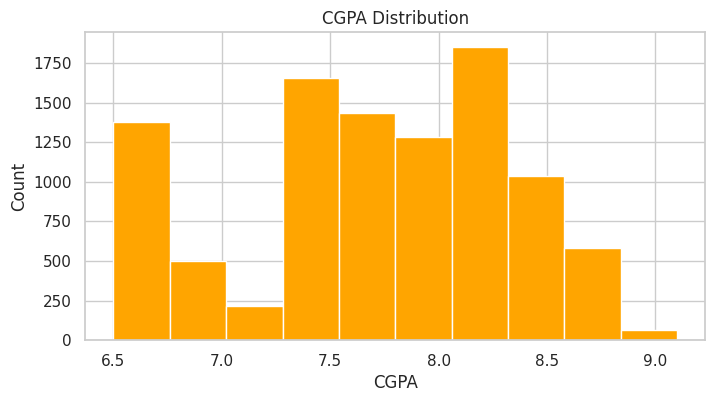

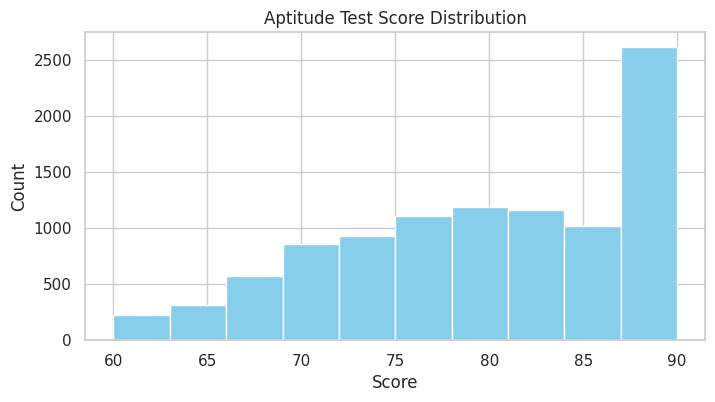

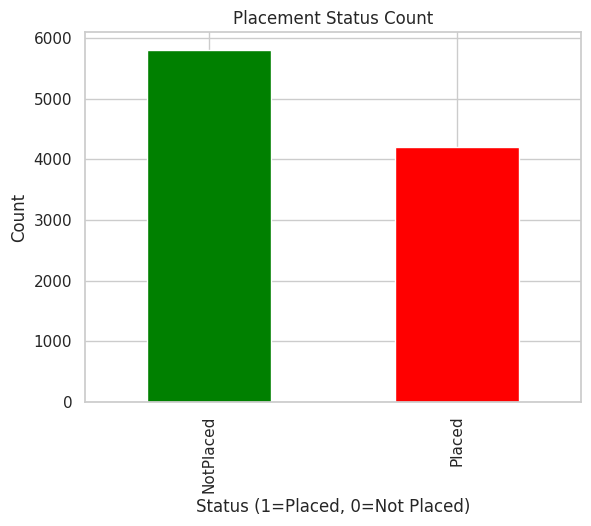

In [ ]:
#A. Basic Matplotlib Plots
# Histogram of CGPA
plt.figure(figsize=(8, 4))
plt.hist(df['CGPA'], bins=10, color='orange')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

# Histogram of Aptitude Score
plt.figure(figsize=(8, 4))
plt.hist(df['AptitudeTestScore'], bins=10, color='skyblue')
plt.title('Aptitude Test Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Bar plot of Placement Status
df['PlacementStatus'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Placement Status Count")
plt.xlabel("Status (1=Placed, 0=Not Placed)")
plt.ylabel("Count")
plt.show()


📌 Step 5: Advanced NumPy Operations

In [ ]:
# Normalize CGPA using z-score
cgpa_mean = np.mean(df['CGPA'])
cgpa_std = np.std(df['CGPA'])
df['CGPA_zscore'] = (df['CGPA'] - cgpa_mean) / cgpa_std

# Boolean indexing: filter students with CGPA between 7.0 and 9.0
cgpa_values = df['CGPA'].values
mid_cgpa_students = df[np.logical_and(cgpa_values >= 7.0, cgpa_values <= 9.0)]
print("\nNumber of students with CGPA between 7.0 and 9.0:", len(mid_cgpa_students))



Number of students with CGPA between 7.0 and 9.0: 8244
